## 3. Run Models

Os modelos escolhidos para serem testados são:
1. RandomForest
2. DecisionTrees
3. Xgboost

Por ser uma base totalmente desbalanceada (COLOCAR PORCENTAGEM)  irei utilizar a função *SMOTE* é a primeira vez que preciso utilizar esse tipo de função e o objetivo é gerar  casos sintéticos como forma de balancear o dataset.
O que eu irei fazer então é comparar a acurácia dos modelos com e sem o SMOTE, para ver além da performance dos modelos, se realmente faz sentido utilizar esse tipo de função.

In [59]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import numpy as np
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


In [60]:
df = pd.read_csv('data_clean.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
y = df.quality.values
X = df[['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']].values

### Aplicando a função SMOTE

In [62]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4 )
X_overed, y_overed = oversample.fit_resample(X, y)

In [63]:
# summarize the new class distribution
counter = Counter(y_overed)
print(counter)

Counter({6: 2198, 5: 2198, 7: 2198, 8: 2198, 4: 2198, 3: 2198, 9: 2198})


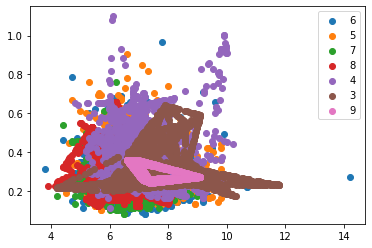

In [64]:

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_overed == label)[0]
	pyplot.scatter(X_overed[row_ix, 0], X_overed[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

É bem nitido o que a função faz, trazendo a uma amostra totalmente desbalanceada, a equidade entre a representatividade das informações que em um caso de previsão é BEM importante.

In [65]:
#Import Model libraries:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import numpy as np

### Criando função para gerar meu X e Y
Esta função irá dividir automaticamente em treino e teste a base e dinamizar o tempo ao rodar cada modelo (até mesmo por que irei testar o dataset com e sem balanceamento sintético)

In [66]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

### Rodando os modelos

In [67]:
model = RandomForestClassifier()
print("SEM balenceamento sintético")
classify(model, X, y)
print("COM balenceamento sintético")
classify(model, X_overed, y_overed)

SEM balenceamento sintético
Accuracy: 68.48979591836735
CV Score: 50.61249504909215
COM balenceamento sintético
Accuracy: 88.27657915258644
CV Score: 84.62250367067658


In [68]:
model = DecisionTreeClassifier()
print("SEM balenceamento sintético")
classify(model, X, y)
print("COM balenceamento sintético")
classify(model, X_overed, y_overed)

SEM balenceamento sintético
Accuracy: 59.10204081632653
CV Score: 38.95513956348628
COM balenceamento sintético
Accuracy: 80.11437483753573
CV Score: 76.3358042429706


In [69]:
xgb.set_config(verbosity=0)
model = xgb.XGBClassifier(num_class=6,
                                  feature_fraction=0.7,
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  eval_metric='mlogloss')


print("SEM balenceamento sintético")
classify(model, X, y)
print("COM balenceamento sintético")
classify(model, X_overed, y_overed)

SEM balenceamento sintético
Accuracy: 65.38775510204081
CV Score: 50.244731191761694
COM balenceamento sintético
Accuracy: 88.17260202755394
CV Score: 83.50479136007306


## Conclusão

O modelo que apresentou melhor acurácia  e validação cruzada foi RandomForest com 88% de acurácia, o que diz que em 88% dos casos o modelo iria prever a qualidade correta do vinho branco, este algoritmo performou bem até na validação cruzada.
**Aqui quero chamar atenção para um ponto: a diferença de acurácia no modelo COM e SEM balanceamento, o quanto se mostrou importante utilizar a função SMOTE.**